# SMART ROI test

-  After running imports skip down to the bit labeled "Simons starts here"

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xml.etree.ElementTree
import os,glob,sys
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
sys.path.append('C:\\Users\\Vinny\\work\\vimms')
sys.path.append('C:\\Users\\Vinny\\work\\pymzmine')

sys.path.append('/Users/simon/git/vimms')
sys.path.append('/Users/simon/git/pymzm')

sys.path.append('/home/simon/git/vimms')
sys.path.append('/home/simon/git/pymzm')


In [4]:
from vimms.PythonMzmine import *
from vimms.MassSpec import IndependentMassSpectrometer
from vimms.Controller import TopNController,RoiController,SmartRoiController
from vimms.PythonMzmine import *

In [5]:
from vimms.Roi import make_roi, RoiToChemicalCreator
from vimms.BOMAS import *
from vimms.Common import *
from vimms.Environment import *
from pathlib import Path
from vimms.PlotsForPaper import get_frag_events

In [6]:
from vimms.DataGenerator import extract_hmdb_metabolite, get_data_source, get_spectral_feature_database

In [7]:
set_log_level_warning()

# Peak Picking

# Note from Simon

- I don't run the following -- just use the results Vinny has in One Drive

### QCA

In [ ]:
mzml_QCA_TopN = 'C:\\Users\\Vinny\\OneDrive - University of Glasgow\\CLDS Metabolomics Project\\TopNvsTopNroi\\QCA\\from_controller_TopN_QCA.mzML'
mzml_QCA_TopN_Roi = 'C:\\Users\\Vinny\\OneDrive - University of Glasgow\\CLDS Metabolomics Project\\TopNvsTopNroi\\QCA\\from_controller_ROI_QCA.mzML'
mzml_QCA_fullscan = 'C:\\Users\\Vinny\\OneDrive - University of Glasgow\\CLDS Metabolomics Project\\TopNvsTopNroi\\QCA\\QCA_22May19_1.mzML'

In [ ]:
qca_dir = 'C:\\Users\\Vinny\\OneDrive - University of Glasgow\\CLDS Metabolomics Project\\TopNvsTopNroi\\QCA\\'

In [ ]:
pick_peaks([mzml_QCA_fullscan],xml_template=QCB_xml_template_ms1, output_dir=qca_dir,mzmine_command=MZMINE_COMMAND)

In [ ]:
pick_peaks([mzml_QCA_TopN],xml_template=QCB_xml_template_ms2, output_dir=qca_dir,mzmine_command=MZMINE_COMMAND)

In [ ]:
pick_peaks([mzml_QCA_TopN_Roi],xml_template=QCB_xml_template_ms2, output_dir=qca_dir,mzmine_command=MZMINE_COMMAND)

### QCB

In [ ]:
qcb_root = '/Users/simon/University of Glasgow/Vinny Davies - CLDS Metabolomics Project/TopNvsTopNroi/QCB/'


mzml_QCB_TopN = os.path.join(qcb_root,'from_controller_TopN_QCB.mzML')
mzml_QCB_TopN_Roi = os.path.join(qcb_root,'from_controller_ROI_QCB.mzML')
mzml_QCB_fullscan = os.path.join(qcb_root,'QCB_22May19_1.mzML')

In [ ]:
qcb_dir = qcb_root

In [ ]:
pick_peaks([mzml_QCB_fullscan],xml_template=QCB_xml_template_ms1, output_dir=qcb_dir,mzmine_command=MZMINE_COMMAND)

In [ ]:
pick_peaks([mzml_QCB_TopN],xml_template=QCB_xml_template_ms2, output_dir=qcb_dir,mzmine_command=MZMINE_COMMAND)

In [ ]:
pick_peaks([mzml_QCB_TopN_Roi],xml_template=QCB_xml_template_ms2, output_dir=qcb_dir,mzmine_command=MZMINE_COMMAND)

# Calculate Score

# From Simon

- Same for this -- have my own analysis code lower down

### QCA

In [ ]:
ms1_picked_peaks_file = qca_dir + '\\QCA_22May19_1_pp.csv'
ms2_picked_peaks_file_TopN = qca_dir + '\\from_controller_TopN_QCA_pp.csv'
ms2_picked_peaks_file_ROI = qca_dir + '\\from_controller_ROI_QCA_pp.csv'

In [ ]:
min_ms1_intensity = 0

In [ ]:
ms2_mzml_file = mzml_QCA_TopN
score_count_TopN, scoring_count_TopN, ms1_df_TopN = peak_scoring_mzml(ms2_mzml_file, ms1_picked_peaks_file, ms2_picked_peaks_file_TopN, min_ms1_intensity)

In [ ]:
ms2_mzml_file = mzml_QCA_TopN_Roi
score_count_ROI, scoring_count_ROI, ms1_df_ROI = peak_scoring_mzml(ms2_mzml_file, ms1_picked_peaks_file, ms2_picked_peaks_file_TopN, min_ms1_intensity)

In [ ]:
score_count_TopN, score_count_ROI

In [ ]:
np.where(np.array(scoring_count_ROI[0:200]) == 0)

In [ ]:
np.where(np.array(scoring_count_TopN[0:200]) == 0)

In [ ]:
ms1_df_ROI.iloc[145]

In [ ]:
ms1_df_ROI.iloc[68]

### QCB

In [ ]:
ms1_picked_peaks_file = os.path.join(qcb_dir,'QCB_22May19_1_pp.csv')
ms2_picked_peaks_file_TopN = os.path.join(qcb_dir,'from_controller_TopN_QCB_pp.csv')
ms2_picked_peaks_file_ROI = os.path.join(qcb_dir,'from_controller_ROI_QCB_pp.csv')

In [ ]:
min_ms1_intensity = 0

In [ ]:
ms2_mzml_file = mzml_QCB_TopN
score_count_TopN, scoring_count_TopN, ms1_df_TopN = peak_scoring_mzml(ms2_mzml_file, ms1_picked_peaks_file, ms2_picked_peaks_file_TopN, min_ms1_intensity)

In [ ]:
ms2_mzml_file = mzml_QCB_TopN_Roi
score_count_ROI, scoring_count_ROI, ms1_df_ROI = peak_scoring_mzml(ms2_mzml_file, ms1_picked_peaks_file, ms2_picked_peaks_file_TopN, min_ms1_intensity)

In [ ]:
score_count_TopN, score_count_ROI

In [ ]:
np.where(np.array(scoring_count_ROI[0:200]) == 0)

In [ ]:
np.where(np.array(scoring_count_TopN[0:200]) == 0)

In [ ]:
ms1_df_ROI.iloc[127]

# Start Simon's stuff from here...

# Test on Simulator (with same settings as MS)

In [8]:
base_dir = os.path.abspath('/Users/simon/University of Glasgow/Vinny Davies - CLDS Metabolomics Project/Trained Models')
base_dir = os.path.abspath('/home/simon/git/vimms/experimental/simon_res/QCB')
ps_frag_QCB = load_obj(Path(base_dir, 'peak_sampler_mz_rt_int_beerqcb_fragmentation.p'))

In [9]:
QCB_MZML2CHEMS_DICT = {'min_ms1_intensity': 0,
                  'mz_tol': 5,
                  'mz_units':'ppm',
                  'min_length':1,
                  'min_intensity':0,
                  'start_rt':0,
                  'stop_rt':1560}

In [10]:
# TopN_QCB_dataset = mzml2chems(mzml_QCB_TopN, ps_frag_QCB, QCB_MZML2CHEMS_DICT, n_peaks=None)

In [10]:
# save_obj(TopN_QCB_dataset, '/Users/simon/OneDrive - University of Glasgow/CLDS Metabolomics Project/TopNvsTopNroi/QCB/SimulatorTests/TopN_QCB_dataset.mzml')
# TopN_QCB_dataset = load_obj('/Users/simon/OneDrive - University of Glasgow/CLDS Metabolomics Project/TopNvsTopNroi/QCB/SimulatorTests/TopN_QCB_dataset.mzml')
TopN_QCB_dataset = load_obj('/home/simon/git/vimms/experimental/simon_res/QCB/TopN_QCB_dataset.mzml')

## Set some parameters that are constant for all simulations

In [20]:

min_rt = 0
max_rt = 26*60 # entire run
min_ms1_intensity = 5000
mz_tol = 10
rt_tol = 15
N = 10


# these are derived from real data (see bottom of notebook)
roi_time_dict = {1: 0.71,2:0.20}
topn_time_dict = {1: 0.60,2:0.20}


ionisation_mode = POSITIVE
isolation_width = 1

test_path = '/home/simon/git/vimms/experimental/simon_res/'
min_roi_intensity = 500
min_roi_length = 3 # still in scans, as to work in seconds, need to pass parameter. But doesn't matter when parameter below is equal to 1!
min_roi_length_for_fragmentation = 1



In [21]:
from vimms.MassSpec import IndependentMassSpectrometer

### Top N

In [34]:
controller = TopNController(ionisation_mode, N, isolation_width, mz_tol, rt_tol, min_ms1_intensity)

mass_spec = IndependentMassSpectrometer(ionisation_mode, TopN_QCB_dataset,
                                        ps_frag_QCB, add_noise=True,
                                       scan_duration_dict = topn_time_dict)

env = Environment(mass_spec, controller, min_rt, max_rt, progress_bar=True)
env.run()

# test_path = '/Users/simon/git/vimms/experimental/simon_res/'
env.write_mzML(test_path, 'topN.mzml')

### ROI

In [16]:

controller = TopN_RoiController(ionisation_mode, isolation_width, mz_tol, min_ms1_intensity,
                           min_roi_intensity, min_roi_length, N, rt_tol, min_roi_length_for_fragmentation)

In [ ]:
mass_spec = IndependentMassSpectrometer(ionisation_mode, TopN_QCB_dataset,
                                        ps_frag_QCB,
                                        add_noise=True,
                                       scan_duration_dict=roi_time_dict)

In [ ]:
env = Environment(mass_spec, controller, min_rt, max_rt, progress_bar=True)
env.run()

In [ ]:
env.write_mzML(test_path, 'ROI.mzml')

## SMART ROI

In [22]:
# SMART ROI
reset_length_seconds = 1e6 # set so reset never happens

iif_values = [2,3,5,10,1e3,1e6]
# dp_values = [1,5,20,50]
# dp_values = [0.1,0.5]
# dp_values = [0]
dp_values = [0,0.1,0.5,1,5]
# iif_values = [1e6]

In [23]:
for iif in iif_values:
    for dp in dp_values:
        print(iif,dp)
        intensity_increase_factor = iif # fragment ROI again if intensity increases 10 fold
        drop_perc = dp/100


        # ROI can also be fragmented again if intensity falls to <1% of the max *since* last fragmentation
        from vimms.Controller import TopN_SmartRoiController
        controller = TopN_SmartRoiController(ionisation_mode, isolation_width, mz_tol, min_ms1_intensity,
                                             min_roi_intensity, min_roi_length, N = N, rt_tol = rt_tol, 
                                             min_roi_length_for_fragmentation = min_roi_length_for_fragmentation,
                                             reset_length_seconds = reset_length_seconds,
                                             intensity_increase_factor = intensity_increase_factor,
                                             drop_perc = drop_perc)

        mass_spec = IndependentMassSpectrometer(ionisation_mode, TopN_QCB_dataset,
                                                ps_frag_QCB,
                                                add_noise=True,
                                               scan_duration_dict=roi_time_dict)

        env = Environment(mass_spec, controller, min_rt, max_rt, progress_bar=True)
        env.run()
        
        out_name = 'SMART3_{}_{}.mzml'.format(iif,dp)
        env.write_mzML(test_path, out_name)

2 0


(1560.280s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.5700000001254/1560 [02:01<00:00, 12.84it/s]


2 0.1


(1560.000s) ms_level=2 N=10 DEW=15: 100%|█████████▉| 1559.8000000001264/1560 [02:02<00:00, 12.70it/s]


2 0.5


(1560.000s) ms_level=2 N=10 DEW=15: 100%|█████████▉| 1559.8000000001264/1560 [02:02<00:00, 12.71it/s]


2 1


(1560.070s) ms_level=2 N=10 DEW=15: 100%|█████████▉| 1559.8700000001268/1560 [01:54<00:00, 13.68it/s]


2 5


(1560.290s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.5800000001288/1560 [01:55<00:00, 13.48it/s]


3 0


(1560.260s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.5500000001093/1560 [01:57<00:00, 13.29it/s]


3 0.1


(1560.260s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.5500000001093/1560 [01:57<00:00, 13.30it/s]


3 0.5


(1560.260s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.5500000001093/1560 [01:59<00:00, 13.00it/s]


3 1


(1560.600s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.8900000001101/1560 [01:57<00:00, 13.23it/s]


3 5


(1560.600s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.8900000001117/1560 [01:55<00:00, 13.51it/s]


5 0


(1560.040s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.3300000001052/1560 [01:59<00:00, 13.01it/s]


5 0.1


(1560.060s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.350000000105/1560 [02:02<00:00, 12.73it/s] 


5 0.5


(1560.020s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.3100000001054/1560 [02:04<00:00, 12.51it/s]


5 1


(1560.000s) ms_level=2 N=10 DEW=15: 100%|█████████▉| 1559.8000000001057/1560 [02:00<00:00, 12.94it/s]


5 5


(1560.560s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.8500000001077/1560 [01:59<00:00, 13.09it/s]


10 0


(1560.480s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.770000000103/1560 [02:07<00:00, 12.24it/s] 


10 0.1


(1560.040s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.3300000001034/1560 [02:12<00:00, 11.73it/s]


10 0.5


(1560.420s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.7100000001035/1560 [01:58<00:00, 13.16it/s]


10 1


(1560.490s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.7800000001037/1560 [01:58<00:00, 13.16it/s]


10 5


(1560.470s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.760000000105/1560 [01:59<00:00, 13.02it/s] 


1000.0 0


(1560.550s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.8400000000904/1560 [02:09<00:00, 12.09it/s]


1000.0 0.1


(1560.510s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.800000000091/1560 [02:06<00:00, 12.30it/s] 


1000.0 0.5


(1560.000s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.290000000091/1560 [02:09<00:00, 12.04it/s] 


1000.0 1


(1560.530s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.8200000000907/1560 [02:14<00:00, 11.57it/s]


1000.0 5


(1560.170s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.460000000093/1560 [02:03<00:00, 12.61it/s] 


1000000.0 0


(1560.570s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.8600000000902/1560 [02:09<00:00, 12.08it/s]


1000000.0 0.1


(1560.570s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.8600000000902/1560 [02:09<00:00, 12.05it/s]


1000000.0 0.5


(1560.530s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.8200000000907/1560 [02:17<00:00, 11.34it/s]


1000000.0 1


(1560.240s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.5300000000905/1560 [02:02<00:00, 12.72it/s]


1000000.0 5


(1560.030s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.3200000000923/1560 [02:01<00:00, 12.85it/s]


In [ ]:
env.write_mzML(test_path, 'SMART.mzml')

## ROI-based scoring

- Make the ROIs in the data
- Count how many have fragmentations in them

In [ ]:
from vimms.Roi import make_roi

In [ ]:
topn_file = os.path.join(test_path, 'topN.mzml')
roi_file = os.path.join(test_path,'ROI.mzml')
smart_file = os.path.join(test_path,'SMART.mzml')

In [ ]:
good_topn,junk_topn = make_roi(topn_file,mz_tol = mz_tol,mz_units = 'ppm',min_length = min_roi_length,min_intensity = min_roi_intensity)

In [ ]:
good_roi,junk_roi = make_roi(roi_file,mz_tol = mz_tol,mz_units = 'ppm',min_length = min_roi_length,min_intensity = min_roi_intensity)

In [ ]:
good_smart,junk_smart = make_roi(smart_file,mz_tol = mz_tol,mz_units = 'ppm',min_length = min_roi_length,min_intensity = min_roi_intensity)

In [26]:
sys.path.append('/Users/simon/git/pymzm')
from ms2_matching import MZMLFile
topn_mz_file = MZMLFile(topn_file)
roi_mz_file = MZMLFile(roi_file)
smart_mz_file = MZMLFile(smart_file)

NameError: name 'topn_file' is not defined

In [ ]:

def summarise(mz_file_object):
    n_scans = len(mz_file_object.scans)
    n_ms1_scans = len(list(filter(lambda x: x.ms_level == 1,mz_file_object.scans)))
    n_ms2_scans = len(list(filter(lambda x: x.ms_level == 2,mz_file_object.scans)))
    print("Total scans = {}, MS1 = {}, MS2 = {}".format(n_scans,n_ms1_scans,n_ms2_scans))
print("TopN:")
summarise(topn_mz_file)
print("ROI:")
summarise(roi_mz_file)
print("SMART:")
summarise(smart_mz_file)



In [ ]:
# This method is very slow.... :-)

def match_scans_to_rois(mz_file_object,roi_list):
    roi2scan = {roi:[] for roi in roi_list}
    scan2roi = {scan:[] for scan in filter(lambda x: x.ms_level == 2,mz_file_object.scans)}
    for scan in mz_file_object.scans:
        if scan.ms_level == 2:
            pmz = scan.precursor_mz
            scan_rt_in_seconds = 60*scan.previous_ms1.rt_in_minutes
            in_mz_range = list(filter(lambda x: min(x.mz_list) <= pmz and max(x.mz_list) >= pmz,roi_list))
            in_rt_range = list(filter(lambda x: x.rt_list[0]<= scan_rt_in_seconds and x.rt_list[-1] >= scan_rt_in_seconds,in_mz_range))
            for roi in in_rt_range:
                roi2scan[roi].append(scan)
                scan2roi[scan].append(roi)
    return roi2scan,scan2roi



In [ ]:
roi_roi2scan,roi_scan2roi = match_scans_to_rois(roi_mz_file,good_roi)

In [ ]:
topn_roi2scan,topn_scan2roi = match_scans_to_rois(topn_mz_file,good_topn)

In [ ]:
smart_roi2scan,smart_scan2roi = match_scans_to_rois(smart_mz_file,good_smart)

In [ ]:
# compute proportion of ROIs that have scans for each
def prop_roi_with_scans(roi2scan):
    with_scan = 0
    without_scan = 0
    for r,scans in roi2scan.items():
        if len(scans) == 0:
            without_scan += 1
        else:
            with_scan += 1
    return with_scan,without_scan,len(roi2scan)

In [ ]:
print("ROI: ",prop_roi_with_scans(roi_roi2scan))
print("topN: ",prop_roi_with_scans(topn_roi2scan))
print("SMART: ",prop_roi_with_scans(smart_roi2scan))

# Test with the picked peaks

- This code uses a method called `load_picked_boxes` and one called `map_boxes_to_scans` from my pymzm repository (in `ms2_matching.py`)
- Load picked boxes loads the peak *boxes* from the output of mzmine (i.e. min/max mz, min/max rt)
- Map boxes to scans takes an MZMLFile object (also from the pymzm repo) and maps the ms2 scans to the boxes (and vice versa). Note that this method was originally designed to map scans to any box they overlap with (i.e. any box where the precursor plus or minus isolation intersected the box). This can be *switched off* by setting the isolation with to zero. Now, it will only find things where the precursor mz is in the box (and RT is ok, obviously)
- We can then simply see how many of the boxes are associated with scans and this tells us how many picked peaks have scans

In [31]:
# test with picked peaks
from ms2_matching import MZMLFile

# Big differences between the following two files!
# perhaps an alignment thing...
# peak_csv_file = os.path.join(qcb_dir,'from_controller_TopN_QCB_pp.csv')
# peak_csv_file = os.path.join(qcb_dir,'QCB_22May19_1_pp.csv') 
peak_csv_file = os.path.join(test_path,'QCB','qcb_pp_wide.csv')

from ms2_matching import load_picked_boxes,map_boxes_to_scans
boxes = load_picked_boxes(peak_csv_file)

['row ID', 'row m/z', 'row retention time', 'from_controller_TopN_QCB.mzML filtered Peak m/z', 'from_controller_TopN_QCB.mzML filtered Peak RT start', 'from_controller_TopN_QCB.mzML filtered Peak RT end', 'from_controller_TopN_QCB.mzML filtered Peak height', 'from_controller_TopN_QCB.mzML filtered Peak area', 'from_controller_TopN_QCB.mzML filtered Peak m/z min', 'from_controller_TopN_QCB.mzML filtered Peak m/z max', '']


In [40]:
# dp_values = [0.1,0.5,1,5,20,50]
# dp_values = [0.1,0.5]


counts = np.zeros((len(iif_values),len(dp_values)))
for i,iif in enumerate(iif_values):
    for j,dp in enumerate(dp_values):
        print(iif,dp)
        fname = 'SMART3_{}_{}.mzml'.format(iif,dp)
        mz_file = MZMLFile(os.path.join(test_path,fname))
        scans2boxes,boxes2scans = map_boxes_to_scans(mz_file,boxes,half_isolation_window = 0)
        counts[i,j] = len(boxes2scans)
        print(counts)

2 0
Loaded 4815 scans
[[1147.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]]
2 0.1
Loaded 4829 scans
[[1147. 1149.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]]
2 0.5
Loaded 4827 scans
[[1147. 1149. 1156.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]]
2 1
Loaded 4838 scans
[[1147. 1149. 1156. 1140.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]]
2 5
Loaded 4875 scans
[[1147. 1149. 1156. 1140. 1055.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0

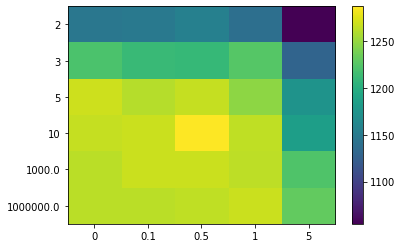

In [41]:
plt.imshow(counts,aspect='auto')
plt.yticks(range(len(iif_values)),iif_values)
plt.xticks(range(len(dp_values)),dp_values)
plt.colorbar()

In [42]:
# smart_scans2boxes,smart_boxes2scans = map_boxes_to_scans(smart_mz_file,boxes,half_isolation_window = 0)
# roi_scans2boxes,roi_boxes2scans = map_boxes_to_scans(roi_mz_file,boxes,half_isolation_window = 0)
topn_mz_file = MZMLFile(os.path.join(test_path,'topN.mzml'))
topn_scans2boxes,topn_boxes2scans = map_boxes_to_scans(topn_mz_file,boxes,half_isolation_window = 0)
# note 0 in previous call is to only find the scans that have a precursor *in* the box, not those that overlap
print("topN: ",len(topn_boxes2scans))


Loaded 6293 scans
topN:  941


In [ ]:
print("Boxes: ",len(boxes))
print("ROI: ",len(roi_boxes2scans))
print("topN: ",len(topn_boxes2scans))
print("SMART: ",len(smart_boxes2scans))

In [ ]:
# are they picking the same ones
roi_box_set = set(roi_boxes2scans.keys())
topn_box_set = set(topn_boxes2scans.keys())
smart_box_set = set(smart_boxes2scans.keys())
print(len(topn_box_set.intersection(smart_box_set)))

## QCA experiments

In [44]:
base_dir = os.path.abspath('/Users/simon/University of Glasgow/Vinny Davies - CLDS Metabolomics Project/Trained Models')
base_dir_qcb = os.path.abspath('/home/simon/git/vimms/experimental/simon_res/QCB')
base_dir_qca = os.path.abspath('/home/simon/git/vimms/experimental/simon_res/QCA')

ps_frag_QCB = load_obj(Path(base_dir_qcb, 'peak_sampler_mz_rt_int_beerqcb_fragmentation.p'))

In [45]:
QCB_MZML2CHEMS_DICT = {'min_ms1_intensity': 0,
                  'mz_tol': 5,
                  'mz_units':'ppm',
                  'min_length':1,
                  'min_intensity':0,
                  'start_rt':0,
                  'stop_rt':1560}

In [46]:
TopN_QCA_dataset = load_obj('/home/simon/git/vimms/experimental/simon_res/QCA/TopN_QCA_dataset.mzml')

In [47]:
min_rt = 0
max_rt = 26*60 # entire run
min_ms1_intensity = 5000
mz_tol = 10
rt_tol = 15
N = 10


# these are derived from real data (see bottom of notebook)
roi_time_dict = {1: 0.71,2:0.20}
topn_time_dict = {1: 0.60,2:0.20}


ionisation_mode = POSITIVE
isolation_width = 1

test_path = '/home/simon/git/vimms/experimental/simon_res/'
min_roi_intensity = 500
min_roi_length = 3 # still in scans, as to work in seconds, need to pass parameter. But doesn't matter when parameter below is equal to 1!
min_roi_length_for_fragmentation = 1



In [48]:
output_folder = os.path.join(test_path,'output_files','QCA')

## TopN

In [55]:
controller = TopNController(ionisation_mode, N, isolation_width, mz_tol, rt_tol, min_ms1_intensity)

mass_spec = IndependentMassSpectrometer(ionisation_mode, TopN_QCA_dataset,
                                        ps_frag_QCB, add_noise=True,
                                       scan_duration_dict = topn_time_dict)

env = Environment(mass_spec, controller, min_rt, max_rt, progress_bar=True)
env.run()

# test_path = '/Users/simon/git/vimms/experimental/simon_res/'
env.write_mzML(output_folder, 'topN.mzml')

(1560.000s) ms_level=2 N=10 DEW=15: 100%|█████████▉| 1559.8000000001427/1560 [01:34<00:00, 16.56it/s]


In [56]:
# SMART ROI
reset_length_seconds = 1e6 # set so reset never happens

iif_values = [2,3,5,10,1e3,1e6]
# dp_values = [1,5,20,50]
# dp_values = [0.1,0.5]
# dp_values = [0]
dp_values = [0,0.1,0.5,1,5]
# iif_values = [1e6]

In [60]:
for iif in iif_values:
    for dp in dp_values:
        print(iif,dp)
        intensity_increase_factor = iif # fragment ROI again if intensity increases 10 fold
        drop_perc = dp/100


        # ROI can also be fragmented again if intensity falls to <1% of the max *since* last fragmentation
        from vimms.Controller import TopN_SmartRoiController
        controller = TopN_SmartRoiController(ionisation_mode, isolation_width, mz_tol, min_ms1_intensity,
                                             min_roi_intensity, min_roi_length, N = N, rt_tol = rt_tol, 
                                             min_roi_length_for_fragmentation = min_roi_length_for_fragmentation,
                                             reset_length_seconds = reset_length_seconds,
                                             intensity_increase_factor = intensity_increase_factor,
                                             drop_perc = drop_perc)

        mass_spec = IndependentMassSpectrometer(ionisation_mode, TopN_QCA_dataset,
                                                ps_frag_QCB,
                                                add_noise=True,
                                               scan_duration_dict=roi_time_dict)

        env = Environment(mass_spec, controller, min_rt, max_rt, progress_bar=True)
        env.run()
        
        out_name = 'SMART3_{}_{}.mzml'.format(iif,dp)
        env.write_mzML(output_folder, out_name)

2 0


(1560.130s) ms_level=2 N=10 DEW=15: 100%|█████████▉| 1559.930000000116/1560 [01:57<00:00, 13.22it/s] 


2 0.1


(1560.030s) ms_level=2 N=10 DEW=15: 100%|█████████▉| 1559.8300000001173/1560 [01:58<00:00, 13.12it/s]


2 0.5


(1560.630s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.920000000117/1560 [01:57<00:00, 13.31it/s] 


2 1


(1560.050s) ms_level=2 N=10 DEW=15: 100%|█████████▉| 1559.8500000001166/1560 [01:48<00:00, 14.39it/s]


2 5


(1560.120s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.41000000012/1560 [01:43<00:00, 15.12it/s]  


3 0


(1560.610s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.9000000001026/1560 [01:57<00:00, 13.32it/s]


3 0.1


(1560.480s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.7700000001025/1560 [01:58<00:00, 13.18it/s]


3 0.5


(1560.590s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.8800000001024/1560 [02:03<00:00, 12.65it/s]


3 1


(1560.020s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.310000000103/1560 [02:08<00:00, 12.17it/s] 


3 5


(1560.000s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.2900000001048/1560 [02:01<00:00, 12.81it/s]


5 0


(1560.220s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.5100000000975/1560 [02:02<00:00, 12.74it/s]


5 0.1


(1560.090s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.3800000000979/1560 [02:03<00:00, 12.63it/s]


5 0.5


(1560.250s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.540000000098/1560 [01:55<00:00, 13.46it/s] 


5 1


(1560.340s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.630000000098/1560 [01:57<00:00, 13.30it/s] 


5 5


(1560.530s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.820000000101/1560 [01:53<00:00, 13.80it/s] 


10 0


(1560.640s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.9300000000958/1560 [01:54<00:00, 13.57it/s]


10 0.1


(1560.660s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.9500000000955/1560 [01:58<00:00, 13.11it/s]


10 0.5


(1560.180s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.470000000096/1560 [02:07<00:00, 12.19it/s] 


10 1


(1560.210s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.5000000000964/1560 [02:03<00:00, 12.67it/s]


10 5


(1560.230s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.5200000000975/1560 [02:03<00:00, 12.66it/s]


1000.0 0


(1560.630s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.9200000000835/1560 [01:59<00:00, 13.06it/s]


1000.0 0.1


(1560.520s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.8100000000836/1560 [01:56<00:00, 13.38it/s]


1000.0 0.5


(1560.300s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.5900000000838/1560 [02:00<00:00, 12.98it/s]


1000.0 1


(1560.460s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.750000000084/1560 [01:57<00:00, 13.28it/s] 


1000.0 5


(1560.450s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.740000000085/1560 [01:55<00:00, 13.49it/s] 


1000000.0 0


(1560.630s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.9200000000835/1560 [01:59<00:00, 13.05it/s]


1000000.0 0.1


(1560.630s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.9200000000835/1560 [01:56<00:00, 13.41it/s]


1000000.0 0.5


(1560.520s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.8100000000836/1560 [02:00<00:00, 12.91it/s]


1000000.0 1


(1560.590s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.8800000000836/1560 [01:57<00:00, 13.29it/s]


1000000.0 5


(1560.600s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.8900000000845/1560 [01:54<00:00, 13.63it/s]


In [61]:
# test with picked peaks
from ms2_matching import MZMLFile,load_picked_boxes,map_boxes_to_scans
peak_csv_file = os.path.join(test_path,'QCA','qca_pp_wide.csv')
boxes = load_picked_boxes(peak_csv_file)

['row ID', 'row m/z', 'row retention time', 'from_controller_TopN_QCA.mzML filtered Peak m/z', 'from_controller_TopN_QCA.mzML filtered Peak RT start', 'from_controller_TopN_QCA.mzML filtered Peak RT end', 'from_controller_TopN_QCA.mzML filtered Peak height', 'from_controller_TopN_QCA.mzML filtered Peak area', 'from_controller_TopN_QCA.mzML filtered Peak m/z min', 'from_controller_TopN_QCA.mzML filtered Peak m/z max', '']


In [62]:
topn_mz_file = MZMLFile(os.path.join(output_folder,'topN.mzml'))
topn_scans2boxes,topn_boxes2scans = map_boxes_to_scans(topn_mz_file,boxes,half_isolation_window = 0)
# note 0 in previous call is to only find the scans that have a precursor *in* the box, not those that overlap
print("topN: ",len(topn_boxes2scans))


Loaded 6356 scans
topN:  797


In [63]:
counts = np.zeros((len(iif_values),len(dp_values)))
for i,iif in enumerate(iif_values):
    for j,dp in enumerate(dp_values):
        print(iif,dp)
        fname = 'SMART3_{}_{}.mzml'.format(iif,dp)
        mz_file = MZMLFile(os.path.join(test_path,'output_files','QCA',fname))
        scans2boxes,boxes2scans = map_boxes_to_scans(mz_file,boxes,half_isolation_window = 0)
        counts[i,j] = len(boxes2scans)
        print(counts)

2 0
Loaded 4694 scans
[[1001.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]]
2 0.1
Loaded 4706 scans
[[1001.  990.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]]
2 0.5
Loaded 4713 scans
[[1001.  990.  987.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]]
2 1
Loaded 4702 scans
[[1001.  990.  987.  976.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]]
2 5
Loaded 4751 scans
[[1001.  990.  987.  976.  936.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0

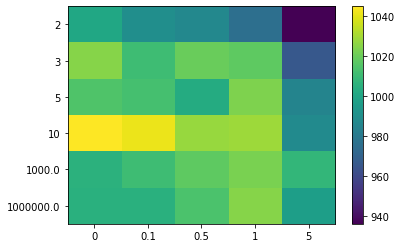

In [64]:
plt.imshow(counts,aspect='auto')
plt.yticks(range(len(iif_values)),iif_values)
plt.xticks(range(len(dp_values)),dp_values)
plt.colorbar()

## Extract some timings from real data

- Cells below extract the scan durations from the real data and compute the mean -- these are then used above in the simulations

In [ ]:
mzml_QCB_TopN
real_QCB_TopN = MZMLFile(mzml_QCB_TopN)


In [ ]:
time_dict = {(1,1):[],(1,2):[],(2,1):[],(2,2):[]}
for i,s in enumerate(real_QCB_TopN.scans[:-1]):
    current = s.ms_level
    next_ = real_QCB_TopN.scans[i+1].ms_level
    tup = (current,next_)
    time_dict[tup].append(60*real_QCB_TopN.scans[i+1].rt_in_minutes - 60*s.rt_in_minutes)
    

In [ ]:
for k,v in time_dict.items():
    if len(v) > 0:
        print(k,sum(v)/len(v))

In [ ]:
mzml_QCB_TopN_Roi
real_QCB_TopN_Roi = MZMLFile(mzml_QCB_TopN_Roi)



In [ ]:
time_dict = {(1,1):[],(1,2):[],(2,1):[],(2,2):[]}
for i,s in enumerate(real_QCB_TopN_Roi.scans[:-1]):
    current = s.ms_level
    next_ = real_QCB_TopN_Roi.scans[i+1].ms_level
    tup = (current,next_)
    time_dict[tup].append(60*real_QCB_TopN_Roi.scans[i+1].rt_in_minutes - 60*s.rt_in_minutes)
    if tup == (1,1):
        print(i)

In [ ]:
for k,v in time_dict.items():
    if len(v) > 0:
        print(k,sum(v)/len(v))

In [ ]:
print(time_dict[(1,1)])

In [ ]:
print(real_QCB_TopN_Roi.scans[6534].rt_in_minutes)
print(real_QCB_TopN_Roi.scans[6535].rt_in_minutes)

In [ ]:
roi_time_dict = {1: 0.71,2:0.20}
topn_time_dict = {1: 0.60,2:0.20}

## Simon peak picking

In [ ]:
xml_file = '/Users/simon/git/vimms/batch_files/QCB_mzmine_batch_ms2.xml'
output_dir = '/Users/simon/git/vimms/experimental/simon_res/'
pick_peaks([smart_file],xml_template=xml_file, output_dir=output_dir)

In [ ]:
pick_peaks([topn_file],xml_template=xml_file, output_dir=output_dir)
pick_peaks([roi_file],xml_template=xml_file, output_dir=output_dir)

In [ ]:
from alignment import JoinAligner

In [ ]:
tt = JoinAligner()
tt.add_file('/Users/simon/University of Glasgow/Vinny Davies - CLDS Metabolomics Project/TopNvsTopNroi/QCB/QCB_22May19_1_pp.csv')
print(len(tt.peaksets))
tt.add_file('/Users/simon/git/vimms/experimental/simon_res/topN_pp.csv')
print(len(tt.peaksets))

In [ ]:
tt_mat = tt.to_matrix()
plt.imshow(tt_mat,aspect='auto')
s = (tt_mat > 0).sum(axis=1)
count = (s==2).sum()
print(count)

In [ ]:
ss = JoinAligner()
ss.add_file('/Users/simon/University of Glasgow/Vinny Davies - CLDS Metabolomics Project/TopNvsTopNroi/QCB/QCB_22May19_1_pp.csv')
ss.add_file('/Users/simon/git/vimms/experimental/simon_res/SMART_pp.csv')
ss_mat = ss.to_matrix()
plt.imshow(ss_mat,aspect='auto')
s = (ss_mat > 0).sum(axis=1)
count = (s==2).sum()
print(count)

In [ ]:
print(topn_file)